In [24]:
import sys
sys.path.append("../")

import cubespa

from matplotlib import pyplot as plt

import numpy as np

from astropy.io import fits

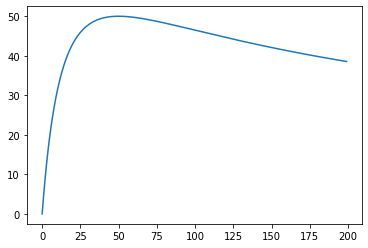

In [5]:
vmax = 108
rmax = 100
Rs = np.arange(0, 200)

vrot = cubespa.brandt_curve(Rs, {"vmax": 50, "rmax": 50, "n": 1})

plt.plot(Rs, vrot)

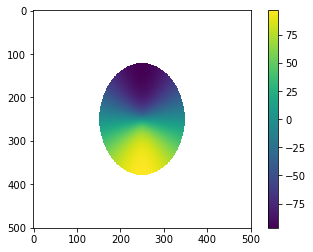

In [7]:
mod = cubespa.VelocityModel((501, 501), rmax=100, inc=40)
vmod = mod.gen_model(cubespa.brandt_curve, rmax=mod.rmax, n=1, vmax=150)


plt.imshow(vmod)
plt.colorbar()

In [30]:
def gen_velocity_cube(vmod, vmin=-50., vmax=50., v_delt=2., dispersion=None, channels=None):
    # Define number and spacing of velocity channels

    if dispersion is None:
        disperson = np.zeros(vmod.shape)

    print(dispersion.shape)
    
    channels = np.arange(vmin, vmax, v_delt)
    num_channels = len(channels)

    # Step 2: Create Velocity Cube
    velocity_cube = np.tile(vmod[:, :, np.newaxis], (1, 1, num_channels)).transpose(2, 0, 1)


    for i in range(0, len(velocity_cube) - 1):
        vmin, vmax = channels[i], channels[i + 1]
        chan = np.copy(velocity_cube[i])

        chan[chan + dispersion < vmin] = np.nan
        chan[chan - dispersion > vmax] = np.nan

        chan[~np.isnan(chan)] = 1
        chan[np.isnan(chan)] = 0

        velocity_cube[i] = chan

    f = fits.HDUList()

    f.append(fits.ImageHDU(data=velocity_cube))
    f.writeto("test_vmod.fits", overwrite=True)

gen_velocity_cube(vmod, v_delt=10)

AttributeError: 'NoneType' object has no attribute 'shape'